In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
plt.rcParams['figure.figsize'] = [15,8]

In [17]:
data = pd.read_csv(r'D:\Imarticus Learning\CO2-Emission-Prediction-project\CO2_emission.csv')
data.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    int64 

In [21]:
data.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


In [5]:
data.Model_Year.value_counts()

2021    935
Name: Model_Year, dtype: int64

In [6]:
corr = data.corr()

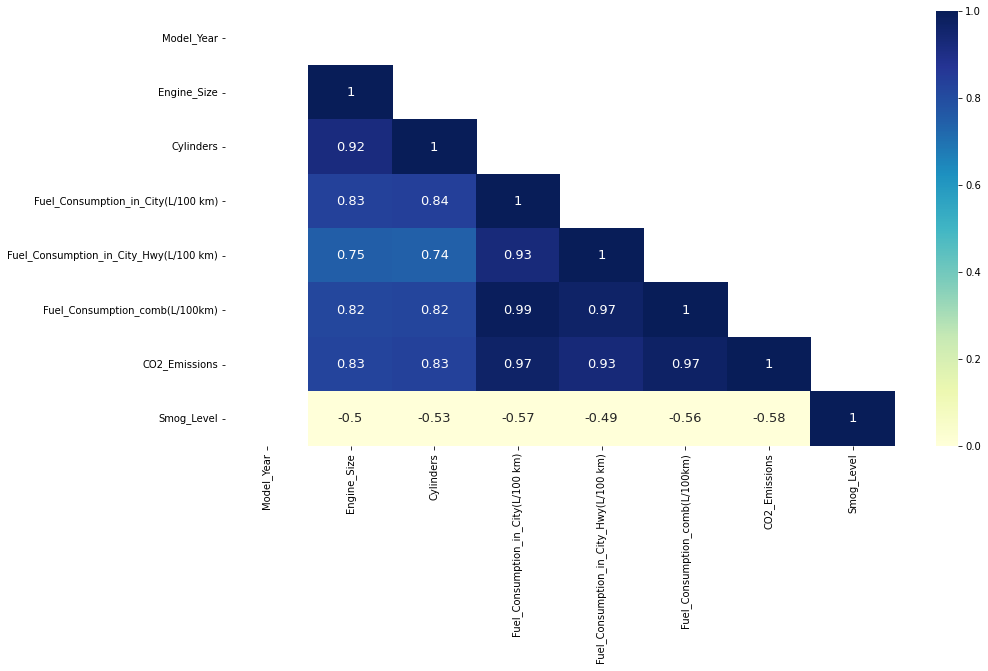

In [7]:
import seaborn as sns
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,k=1)]= True
sns.heatmap(corr, cmap ='YlGnBu',annot=True,annot_kws={'size' : 13},vmax=1,vmin=0,mask =mask)

In [8]:
fuel_consumption =pd.Series((data["Fuel_Consumption_in_City(L/100 km)"]+ data["Fuel_Consumption_in_City_Hwy(L/100 km)"])/2, name = "mean of city + Hwy")
print(fuel_consumption.dtypes)
difference = pd.Series(fuel_consumption - data["Fuel_Consumption_comb(L/100km)"],name = "Difference")
print(difference.dtypes)
comb =pd.Series(data["Fuel_Consumption_comb(L/100km)"],name = "comb of city + Hwy")
print(comb.dtypes)
fuel_comsumption_diff = pd.concat([fuel_consumption,comb,difference], axis=1)
print(fuel_comsumption_diff.head(5))


float64
float64
float64
   mean of city + Hwy  comb of city + Hwy  Difference
0                8.45                 8.6       -0.15
1               10.95                11.0       -0.05
2                9.80                 9.9       -0.10
3               10.20                10.3       -0.10
4                9.60                 9.8       -0.20


Here **Fuel_Consumption_comb(L/100km)** is the **Mean** of **Fuel_Consumption_in_City(L/100 km)** and **Fuel_Consumption_in_Hwy(L/100 km)**. we drop Fuel_Consumption_in_City(L/100 km) and Fuel_Consumption_in_Hwy(L/100 km) columns from our data to avoid multicollinearity.

In [9]:
data = data.drop(['Model_Year','Fuel_Consumption_in_City(L/100 km)','Fuel_Consumption_in_City_Hwy(L/100 km)'],axis=1)
data.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions',
       'Smog_Level'],
      dtype='object')

In [10]:
data.Cylinders.value_counts()

4     407
6     265
8     213
12     21
3      18
10      8
16      2
5       1
Name: Cylinders, dtype: int64

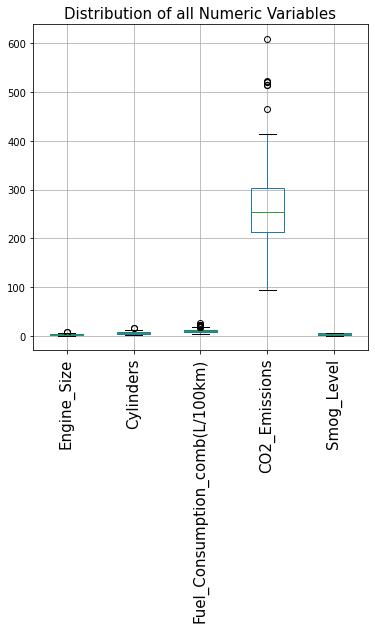

In [11]:
data.boxplot(figsize = (6,6))
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()


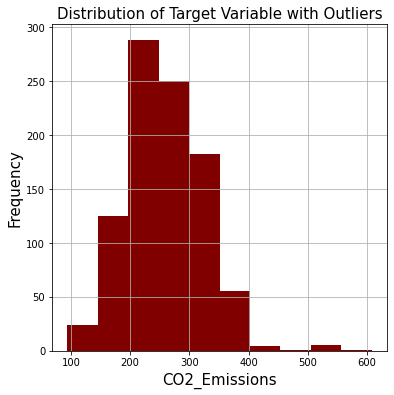

In [89]:
data.CO2_Emissions.hist(color = 'maroon', figsize=(6,6))
plt.title('Distribution of Target Variable with Outliers', fontsize = 15)
plt.xlabel('CO2_Emissions', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

In [13]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Engine_Size                        2.0
Cylinders                          4.0
Fuel_Consumption_comb(L/100km)     4.0
CO2_Emissions                     90.5
Smog_Level                         3.0
dtype: float64


<ipython-input-14-1be39f2061f3>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_1 = data[~((data < (Q1-1.5*IQR))| (data > (Q3+1.5*IQR))).any(axis =1)]


(array([1, 2, 3, 4, 5]), <a list of 5 Text major ticklabel objects>)

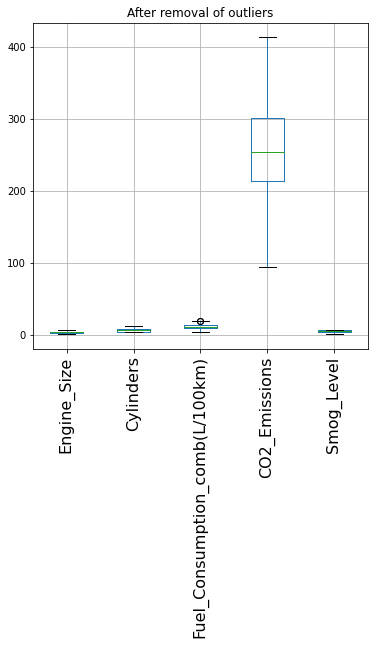

In [14]:
data_1 = data[~((data < (Q1-1.5*IQR))| (data > (Q3+1.5*IQR))).any(axis =1)]
data_1 = data_1.reset_index(drop=True)
data_1.boxplot(figsize=(6,6))
plt.title("After removal of outliers")
plt.xticks(fontsize=16,rotation= 90)

In [15]:
data_1.shape

(924, 9)

In [16]:
missing_values=data.isnull().sum().sort_values(ascending = False)
missing_values

Make                              0
Model                             0
Vehicle_Class                     0
Engine_Size                       0
Cylinders                         0
Transmission                      0
Fuel_Consumption_comb(L/100km)    0
CO2_Emissions                     0
Smog_Level                        0
dtype: int64

In [17]:
X = data.drop('CO2_Emissions',axis =1)
y = data.CO2_Emissions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49892c8e80>,
      dtype=object)

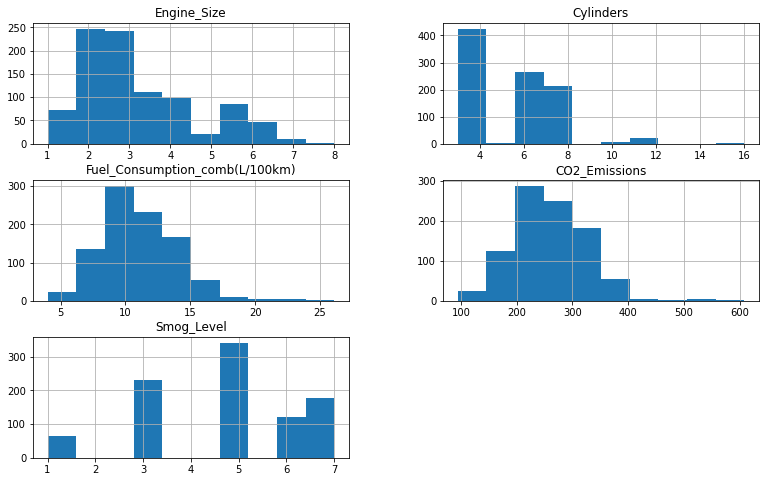

In [18]:
data.hist(figsize=(13,8))

Text(0, 0.5, 'Fuel_Consumption_comb(L/100km)')

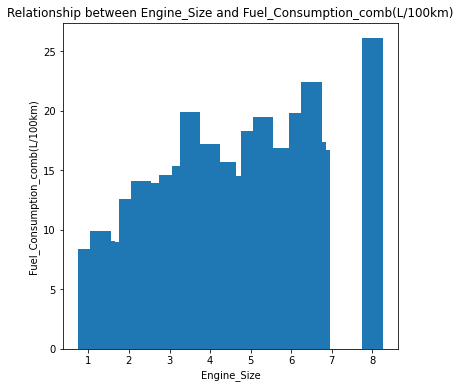

In [94]:
plt.figure(figsize =(6,6))
plt.bar(data["Engine_Size"], data["Fuel_Consumption_comb(L/100km)"],width=0.5)
plt.title("Relationship between Engine_Size and Fuel_Consumption_comb(L/100km)")
plt.xlabel("Engine_Size")
plt.ylabel("Fuel_Consumption_comb(L/100km)")


In [21]:
data.Engine_Size.cov(data["Fuel_Consumption_comb(L/100km)"])

3.254553561817953

Text(0, 0.5, 'Fuel_Consumption_comb(L/100km)')

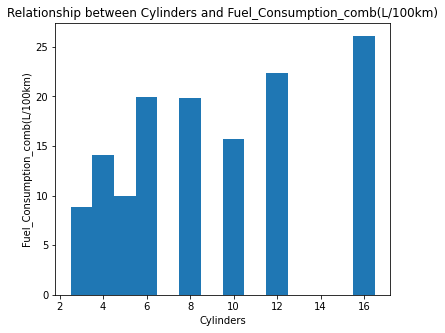

In [98]:
plt.figure(figsize =(6,5))
plt.bar(data["Cylinders"], data["Fuel_Consumption_comb(L/100km)"],width = 1)
plt.title("Relationship between Cylinders and Fuel_Consumption_comb(L/100km)")
plt.xlabel("Cylinders")
plt.ylabel("Fuel_Consumption_comb(L/100km)")

In [23]:
data.Cylinders.cov(data["Fuel_Consumption_comb(L/100km)"])

4.6587330669079

In [24]:
data.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions',
       'Smog_Level'],
      dtype='object')

In [25]:
print(data["Smog_Level"].value_counts())
data["Cylinders"].value_counts()

5    341
3    232
7    176
6    120
1     66
Name: Smog_Level, dtype: int64


4     407
6     265
8     213
12     21
3      18
10      8
16      2
5       1
Name: Cylinders, dtype: int64

In [26]:
x=data.groupby(["Cylinders",'Transmission','Smog_Level','Vehicle_Class','Engine_Size'],as_index=False)["CO2_Emissions"].agg(['mean'])
print(x)

                                                                             mean
Cylinders Transmission Smog_Level Vehicle_Class           Engine_Size            
3         A8           7          SUV: Small              1.5          196.333333
          A9           7          SUV: Small              1.3          196.000000
          AM7          7          Minicompact             1.5          176.000000
                                  Subcompact              1.5          176.000000
          AS6          5          SUV: Small              1.0          197.000000
          AS8          7          Mid-size                1.5          202.000000
          AV           5          Compact                 1.2          143.000000
                       7          SUV: Small              1.2          188.000000
                                                          1.3          179.000000
          M5           5          Compact                 1.2          151.000000
          M6    

In [27]:
data.Smog_Level.value_counts()

5    341
3    232
7    176
6    120
1     66
Name: Smog_Level, dtype: int64

Text(0, 0.5, 'Cylinders')

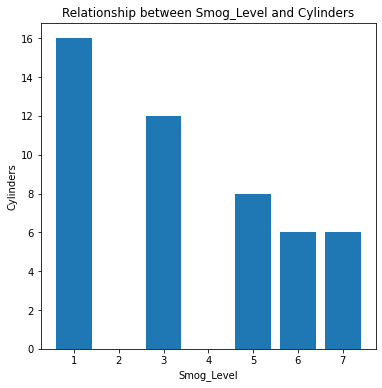

In [99]:
plt.figure(figsize=(6,6))
plt.bar(data.Smog_Level,data.Cylinders)
plt.title("Relationship between Smog_Level and Cylinders")
plt.xlabel("Smog_Level")
plt.ylabel("Cylinders")

In [29]:
data.Smog_Level.cov(data.Cylinders)

-1.8035933080649051

Text(0, 0.5, 'Engine_Size')

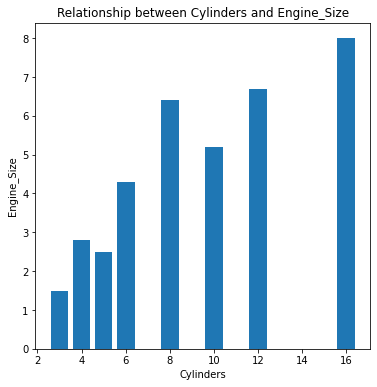

In [100]:
plt.figure(figsize = (6,6))
plt.bar(data["Cylinders"], data["Engine_Size"])
plt.title("Relationship between Cylinders and Engine_Size")
plt.xlabel("Cylinders")
plt.ylabel("Engine_Size")

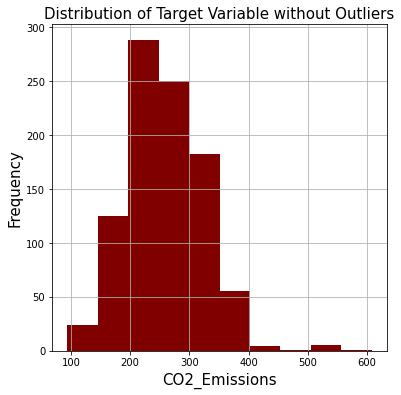

In [31]:
data.CO2_Emissions.hist(color = 'maroon',figsize = (6,6))
plt.title('Distribution of Target Variable without Outliers', fontsize = 15)
plt.xlabel('CO2_Emissions', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

                         
  Here is no missing Values.

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state = 1)
print('Shape of x_train',x_train.shape)
print('shape of x_test',x_test.shape)
print('Shape of Y_train',Y_train.shape)
print('Shape of Y_test',Y_test.shape)

Shape of x_train (654, 8)
shape of x_test (281, 8)
Shape of Y_train (654,)
Shape of Y_test (281,)


In [34]:
x_train=x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
print(type(x_train),type(x_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [35]:
Y_train=Y_train.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)
print(Y_train.head())
print(Y_test.head())

0    130
1    237
2    308
3    278
4    309
Name: CO2_Emissions, dtype: int64
0    279
1    269
2    205
3    205
4    281
Name: CO2_Emissions, dtype: int64


In [36]:
x_num=x_train[x_train.columns[x_train.dtypes != 'object']]
print(x_num.shape)
print(type(x_num))

x_num_test=x_test[x_train.columns[x_train.dtypes != 'object']]
print(x_num_test.shape)
print(type(x_num_test))

(654, 4)
<class 'pandas.core.frame.DataFrame'>
(281, 4)
<class 'pandas.core.frame.DataFrame'>


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_num_tr = scaler.fit_transform(x_num)
x_num_te = scaler.transform(x_num_test)
x_num_tr = pd.DataFrame(x_num_tr)
x_num_te = pd.DataFrame(x_num_te)
print(x_num_tr.shape,type(x_num_tr))
print('\n',x_num_te.shape,type(x_num_te))

(654, 4) <class 'pandas.core.frame.DataFrame'>

 (281, 4) <class 'pandas.core.frame.DataFrame'>


In [38]:
Y_train= Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)
print(Y_train.shape)
print(Y_test.shape)

(654, 1)
(281, 1)


In [39]:
Y_tr = scaler.fit_transform(Y_train)
Y_te = scaler.transform(Y_test)

In [40]:
x_cat=x_train[x_train.columns[x_train.dtypes == 'object']]
print(x_cat.shape)
x_cat.head()

(654, 4)


,Make,Model,Vehicle_Class,Transmission
0,Lexus,UX 250h,Compact,AV6
1,Audi,S4 Sedan quattro,Compact,AS8
2,Ford,Bronco Sasquatch 4WD,SUV: Small,AS10
3,Porsche,911 Targa 4S,Minicompact,M7
4,Chevrolet,Tahoe,SUV: Standard,A10


In [41]:
#test
x_cat_test=x_test[x_train.columns[x_train.dtypes == 'object']]
print(x_cat_test.shape)
x_cat_test.head()

(281, 4)


,Make,Model,Vehicle_Class,Transmission
0,Genesis,GV80 AWD,SUV: Standard,AS8
1,Audi,RS 5 Coupe quattro,Subcompact,AS8
2,Subaru,Legacy AWD,Full-size,AV8
3,Kia,Seltos AWD,SUV: Small,AM7
4,Audi,Q7 55 TFSI quattro,SUV: Standard,AS8


In [42]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False,handle_unknown="ignore")
x_nom=x_cat.drop('Vehicle_Class',axis =1)
x_ohe=ohe.fit_transform(x_nom)
x_ohe = pd.DataFrame(x_ohe)
print(x_ohe.shape)
print(type(x_ohe))

(654, 588)
<class 'pandas.core.frame.DataFrame'>


In [43]:
x_nom_test=x_cat_test.drop('Vehicle_Class',axis =1)
x_ohe_test=ohe.transform(x_nom_test)
x_ohe_test = pd.DataFrame(x_ohe_test)
print(x_ohe_test.shape)
print(type(x_ohe_test))

(281, 588)
<class 'pandas.core.frame.DataFrame'>


In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ps=['Vehicle_Class']
x_le=x_cat[ps]
le=LabelEncoder()
x_label =le.fit_transform(x_le)
x_label = pd.DataFrame(x_label)
print(x_label.head())
print(type(x_label))
print(x_label.shape)

   0
0  0
1  0
2  7
3  3
4  8
<class 'pandas.core.frame.DataFrame'>
(654, 1)


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
#test
ps=['Vehicle_Class']
x_le_test=x_cat_test[ps]
x_le_test.loc[~x_le_test['Vehicle_Class'].isin(le.classes_),'Vehicle_Class'] = -1
x_label_test = x_le_test.loc[x_le_test['Vehicle_Class'].isin(le.classes_),'Vehicle_Class'] = le.transform(x_le_test['Vehicle_Class'][x_le_test['Vehicle_Class'].isin(le.classes_)])
x_label_test = pd.DataFrame(x_label_test)
print(x_label_test.shape)
print(type(x_label_test))
print(x_label_test.head())


(281, 1)
<class 'pandas.core.frame.DataFrame'>
    0
0   8
1  12
2   1
3   7
4   8


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [46]:
train_x = pd.concat([x_label,x_num_tr,x_ohe],axis=1)
print(train_x.shape)
# print(train_x.head())
train_x.head(1)

(654, 593)


,0,0,1,2,3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587
0,0,-0.883919,-0.874013,-2.003464,1.351959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [47]:
test_x = pd.concat([x_label_test,x_num_te,x_ohe_test],axis=1)
print(test_x.shape)

(281, 593)


In [48]:
Y_tra = pd.DataFrame(Y_tr,columns = ['CO2_Emissions'])
Y_tes = pd.DataFrame(Y_te,columns = ['CO2_Emissions'])
print(type(Y_tra))
print(type(Y_tes))
print(Y_tra.shape)
print(Y_tes.shape)
print(Y_tra.head())
print(Y_tes.head())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(654, 1)
(281, 1)
   CO2_Emissions
0      -2.071758
1      -0.355784
2       0.782853
3       0.301739
4       0.798890
   CO2_Emissions
0       0.317776
1       0.157404
2      -0.868973
3      -0.868973
4       0.349850


In [88]:
print(type(test_x))
print((test_x.isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
0      0
0      0
1      0
2      0
3      0
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0

In [50]:
train_x=train_x.reset_index(drop=True)
test_x = test_x.reset_index(drop=True)
print(type(train_x),type(test_x))
Y_tra=Y_tra.reset_index(drop=True)
Y_tes=Y_tes.reset_index(drop=True)
print(type(train_x),type(test_x))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
linreg_ols = sm.OLS(Y_tra, train_x).fit()

In [52]:

y_pred_ols = linreg_ols.predict(test_x)


In [54]:
print(y_pred_ols.isnull().sum())
y_pred_nump = y_pred_ols.to_numpy()
print(np.any(np.isnan(y_pred_nump)))
y_pred_nump = np.nan_to_num(y_pred_nump)
print(y_pred_nump)
y_pred_ols__ = pd.DataFrame([y_pred_ols])
print(type(y_pred_ols__))
print(y_pred_ols__.shape)
y_pred_ols_ =y_pred_ols__.T
print(type(y_pred_ols_))
print(y_pred_ols_.shape)

0
False
[ 1.78151966e-01  1.58616223e+00 -1.02467939e+00 -9.62637777e-01
  4.53624414e-01  4.78499323e-01  2.32182688e-01  4.70461921e-01
 -2.30949430e+00  1.64454816e-01  9.14843350e-01  5.51169417e-01
 -1.63915238e+00  1.86919756e+00  2.21662847e+00 -1.92540472e+00
 -1.57980571e+00 -1.27502870e+00 -5.89687794e-01  3.98222488e+00
  3.27297240e-01  1.40166678e-01  2.28789531e-01 -2.77010572e-01
  9.26059960e-01  1.15398695e+00 -1.62308913e+00  9.21679635e-01
  1.17017177e+00  3.21498577e+00 -4.72513210e-01  2.34735607e-01
  5.16426131e-01  4.59503227e-01 -4.16400116e-01  8.45557857e-01
  2.02888832e-01  1.69767170e-01 -9.67274069e-01 -1.62138289e+00
 -2.27723387e+00 -8.95379458e-01  4.31324007e-01 -4.67299541e-01
  1.58638513e+00 -1.33331048e-02 -1.00970693e-01 -1.88166991e-01
  1.62433839e+00  1.36648710e+00  1.19452074e+00 -1.43669370e+00
 -3.24722735e+00 -6.91143752e-01  4.56644136e-01  3.29203067e+00
  1.03139729e+00 -1.21941413e+00 -1.62869126e+00 -3.70713320e-01
  1.08643943e+00 

In [55]:
from sklearn import metrics
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(Y_tes, y_pred_ols_)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(Y_tes, y_pred_ols_)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(Y_tes, y_pred_ols_))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.7164332271558307
Mean Squared Error (MSE): 0.9519683935856634
Root Mean Squared Error (RMSE): 0.9756886765693571


In [56]:
cols = ['Model', 'MAE', 'MSE', 'RMSE']

result_tabulation_ols = pd.DataFrame(columns = cols)

rf_reg_metrics = pd.Series({'Model': "OLS",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation_ols = result_tabulation_ols.append(rf_reg_metrics, ignore_index = True)

result_tabulation_ols

,Model,MAE,MSE,RMSE
0,OLS,0.716433,0.951968,0.975689


In [57]:
# y_pred_nump = y_pred_ols.to_numpy()
# print(np.any(np.isnan(y_pred_nump)))
# y_pred_nump = np.nan_to_num(y_pred_nump)
# print(y_pred_nump)
# y_pred_ols__ = pd.DataFrame([y_pred_nump])

Ensemble Technic

In [58]:
# predict the values
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# build the model
meta_estimator = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1)) #Similar to a random forest, just that the DT's are having all the features to split on

# fit the model
meta_estimator.fit(train_x, Y_tra) 
y_pred_estimator = meta_estimator.predict(test_x)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [59]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(Y_tes, y_pred_estimator)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(Y_tes, y_pred_estimator)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(Y_tes,y_pred_estimator))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.08713702832097889
Mean Squared Error (MSE): 0.0800656535634092
Root Mean Squared Error (RMSE): 0.2829587488723563


In [60]:
cols = ['Model', 'MAE', 'MSE', 'RMSE']

result_tabulation_1 = pd.DataFrame(columns = cols)

rf_reg_metrics = pd.Series({'Model': "Bagging ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation_1 = result_tabulation_1.append(rf_reg_metrics, ignore_index = True)

result_tabulation_1

,Model,MAE,MSE,RMSE
0,Bagging,0.087137,0.080066,0.282959


In [61]:
from sklearn.ensemble import AdaBoostRegressor

# build the model
adaboost = AdaBoostRegressor(random_state=10)
# fit the model
adaboost.fit(train_x, Y_tra)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(random_state=10)

In [62]:
# predict the values
y_pred_adaboost  = adaboost.predict(test_x)

In [63]:
rf_reg_MAE = metrics.mean_absolute_error(Y_tes, y_pred_adaboost)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(Y_tes, y_pred_adaboost)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(Y_tes, y_pred_adaboost))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.18005365436780554
Mean Squared Error (MSE): 0.09702401800950186
Root Mean Squared Error (RMSE): 0.31148678625184384


In [64]:
rf_reg_metrics = pd.Series({'Model': "AdaBoost ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation_1 = result_tabulation_1.append(rf_reg_metrics, ignore_index = True)

result_tabulation_1

,Model,MAE,MSE,RMSE
0,Bagging,0.087137,0.080066,0.282959
1,AdaBoost,0.180054,0.097024,0.311487


In [65]:
from xgboost.sklearn import XGBRegressor 
xgbm = XGBRegressor(random_state=1,learning_rate=0.01)
train_X = train_x.values
test_X = test_x.values
xgbm.fit(train_X, Y_tra)

[16:50:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, random_state=1)

In [66]:
# predict the values
y_pred_xgbm  = xgbm.predict(test_X)

In [67]:
rf_reg_MAE = metrics.mean_absolute_error(Y_tes, y_pred_xgbm)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(Y_tes, y_pred_xgbm)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(Y_tes, y_pred_xgbm))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.42171345080153033
Mean Squared Error (MSE): 0.28869506851819005
Root Mean Squared Error (RMSE): 0.5373035161974934


In [68]:
rf_reg_metrics = pd.Series({'Model': "xgboost ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation_1 = result_tabulation_1.append(rf_reg_metrics, ignore_index = True)

result_tabulation_1

,Model,MAE,MSE,RMSE
0,Bagging,0.087137,0.080066,0.282959
1,AdaBoost,0.180054,0.097024,0.311487
2,xgboost,0.421713,0.288695,0.537304


Feature Selection Using Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [70]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(train_x,Y_tra)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestRegressor())

In [71]:
selected_feat= train_x.columns[(sel.get_support())]
len(selected_feat)

5

In [72]:
print(selected_feat)

Int64Index([0, 1, 2, 6, 567], dtype='int64')


In [73]:
X_train_1 = train_x[selected_feat]
X_test_1 =  test_x[selected_feat]
print(X_train_1.columns)
print(X_train_1.shape)
print(X_test_1.shape)

Int64Index([0, 0, 0, 1, 1, 2, 2, 6, 567], dtype='int64')
(654, 9)
(281, 9)


In [74]:
meta_estimator = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
meta_estimator.fit(X_train_1, Y_tra)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=1))

In [75]:
y_pred_bag = meta_estimator.predict(X_test_1)

In [76]:
rf_reg_MAE = metrics.mean_absolute_error(Y_tes, y_pred_bag)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(Y_tes, y_pred_bag)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(Y_tes, y_pred_bag))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.08236828249731964
Mean Squared Error (MSE): 0.07772034811152567
Root Mean Squared Error (RMSE): 0.2787836941277694


In [77]:
cols = ['Model', 'MAE', 'MSE', 'RMSE']
result_tabulation_2 = pd.DataFrame(columns = cols)
rf_reg_metrics = pd.Series({'Model': "Bagging",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation_2 = result_tabulation_2.append(rf_reg_metrics, ignore_index = True)
result_tabulation_2

,Model,MAE,MSE,RMSE
0,Bagging,0.082368,0.07772,0.278784


In [78]:
# build the model
adaboost = AdaBoostRegressor(random_state=10)
# fit the model
adaboost.fit(X_train_1, Y_tra)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(random_state=10)

In [79]:
y_pred_adaboost  = adaboost.predict(X_test_1)

In [80]:
rf_reg_MAE = metrics.mean_absolute_error(Y_tes, y_pred_adaboost)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(Y_tes, y_pred_adaboost)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(Y_tes, y_pred_adaboost))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.1853602251742024
Mean Squared Error (MSE): 0.08418192945758676
Root Mean Squared Error (RMSE): 0.2901412232992526


In [81]:
rf_reg_metrics = pd.Series({'Model': "AdaBoost ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation_2 = result_tabulation_2.append(rf_reg_metrics, ignore_index = True)
result_tabulation_2

,Model,MAE,MSE,RMSE
0,Bagging,0.082368,0.077720,0.278784
1,AdaBoost,0.185360,0.084182,0.290141


In [82]:
# build the model
xgbm = XGBRegressor(random_state=1,learning_rate=0.01)
# fit the model
x_train = X_train_1.values
x_test = X_test_1.values
xgbm.fit(x_train, Y_tra)

[16:50:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, random_state=1)

In [83]:
y_pred_xgbm  = xgbm.predict(x_test)

In [84]:
rf_reg_MAE = metrics.mean_absolute_error(Y_tes, y_pred_xgbm)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(Y_tes, y_pred_xgbm)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(Y_tes, y_pred_xgbm))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.42171345080153033
Mean Squared Error (MSE): 0.28869506851819005
Root Mean Squared Error (RMSE): 0.5373035161974934


In [85]:
rf_reg_metrics = pd.Series({'Model': "XGBoosting",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation_2 = result_tabulation_2.append(rf_reg_metrics, ignore_index = True)
result_tabulation_2

,Model,MAE,MSE,RMSE
0,Bagging,0.082368,0.077720,0.278784
1,AdaBoost,0.185360,0.084182,0.290141
2,XGBoosting,0.421713,0.288695,0.537304


In [86]:
print('OLS')
print(result_tabulation_ols,'\n')
print('Ensemble Technics Without Feature Selection')
print(result_tabulation_1,'\n')
print('Ensemble Technics After Random Forest Feature Selection')
print(result_tabulation_2,'\n')

OLS
  Model       MAE       MSE      RMSE
0   OLS  0.716433  0.951968  0.975689 

Ensemble Technics Without Feature Selection
       Model       MAE       MSE      RMSE
0   Bagging   0.087137  0.080066  0.282959
1  AdaBoost   0.180054  0.097024  0.311487
2   xgboost   0.421713  0.288695  0.537304 

Ensemble Technics After Random Forest Feature Selection
        Model       MAE       MSE      RMSE
0     Bagging  0.082368  0.077720  0.278784
1   AdaBoost   0.185360  0.084182  0.290141
2  XGBoosting  0.421713  0.288695  0.537304 



In the above model performance Ensembel techinques with and without Feature selection perform almost similar and better than OLS model.